# Educational Equity and SAT Scores

Laura Lu

Aug 4 2023

# Introduction

The SAT (Scholastic Assessment Test) is a standardized test widely used for college admissions in the United States.  The SAT covers critical reading, mathematics, and writing, and scores range from 400 to 1600.The dataset we will be exploring contains SAT scores from various states across the country, including the average total SAT scores for each state, as well as the scores for the individual sections. Additionally, the dataset includes demographic information about test-takers, such as gender, ethnicity, and socioeconomic status. Measuring and analyzing these factors enable us to investigate potential disparities in SAT performance.

How a student performs on the SAT can tremendously impact their future. Understanding the patterns in scores in light of geographical and demographical information can help identify where more academic support is needed. Affirmative action continues to be a contentious topic in today's college admission process, especially after the Supreme Court banned affirmative action. Affirmative action seeks to increase representation of underrepresented groups and promote diversity. Examining this dataset can also set the stage for future exploration of the potential educational and career outcomes of affirmative action.

Some questions that I hope to investigate through this project are:
1. How do states with different educational policies and funding levels perform on the SAT? 
2. Are there any correlations between SAT scores and demographic factors, such as gender, ethnicity, or socioeconomic status? 

The dataset can be accessed at this link: https://corgis-edu.github.io/corgis/csv/school_scores/. Discussions about missing data and gaps in the narrative are further discussed in the Discussion section.

# Methods

### Pandas

Below is the code that I use to grab the csv file quickly. It begins with importing the required libraries which are also found in requirements.txt:

- requests: Used for making HTTP requests to access web pages.
- BeautifulSoup: Used for parsing and navigating HTML content.
- pandas: Used for data manipulation and analysis using DataFrames.

This code defines a function pdcorgis() which downloads a dataset from the Corgis Datasets website and creates a DataFrame using pandas. The dataset is then stored in a variable called df. This data set was already cleaned by the time that I had acccessed it from the website, thus we could directly begin to query for columns.

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def pdcorgis(a):
  a_low = a.lower()
  # get the html page
  response = requests.get(f'https://corgis-edu.github.io/corgis/csv/{a_low}/') 

  soup = BeautifulSoup(response.text, 'html.parser')
  alink = soup.find_all('a')
  store = False
  
  for i in alink:
    if i.has_attr('download'):
        dlink = i['href']
        store = True
        break

  if (store):
    full = f'https://corgis-edu.github.io/corgis/csv/{a_low}/' + dlink
    df = pd.read_csv(full)
    return df

  return None

corgis_list = ['School_Scores']
df = pdcorgis(corgis_list[0])

There were over 50 specific factors that were measured in this dataset however, they could be grouped into bigger sub groups which are the following. 
- Year
- State Information: State Code and State Name
- Total Scores and Individual Scores in SAT Subsections
- Total Test Takers
- Average GPA Across A Variety of Subjects
- Family Income of Test Takers for Variety of Subjects
- Gender of Test Takers 

Before analyzing the data, I wanted to take a glimpse at the big picture of this data set to help with diving into correlations between different factors. Specifically, I explore the average total number of test takers in each state, number of test takers in each income bracket, average combined score, and average GPA. I wanted a better understanding of the variables measuring geography and privilege and how it may be correlated with performance which will later be explored in Results. 

### NLP

I used the sentiment analyzer to analyze the language used in the Supreme Court's case statements when affirmative action was banned. The SentimentIntensityAnalyzer from the nltk library idenitfies whether the language used is generally positive, negative, or neutral. The case statement is in the format of the PDF so I needed to use the PyPDF2 library to convert the text in the PDF into extract the text and store it in a variable.

In [57]:
import PyPDF2

def extract(path):
    text = ""
    with open(pdf_file_path, "rb") as pdf_file:
        read = PyPDF2.PdfReader(pdf_file)
        num = len(read.pages)
        
        for page_num in range(num):
            page = read.pages[page_num]
            text += page.extract_text()

    return text

# Replace 'your_pdf_file.pdf' with the actual path to your PDF file
path = "case.pdf"

# Call the function to extract text from the PDF file
case = extract(path)


In [58]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stop = set(stopwords.words('english'))
vader = vader.SentimentIntensityAnalyzer()

## Results

### Average Total Number of Test Takers in Each State

I begin with investigating whether or not there is a geographical variance in the number of test takers. Understanding geographical variance in the number of test-takers can provide insight into the number of resources in each state which can perpetuate educational equity.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'State' and calculate the average 'Total Test-takers'
avg_total = df.groupby('State.Code')['Total.Test-takers'].mean()

# Sort the results in descending order
avg_total = avg_total.sort_values(ascending=False)

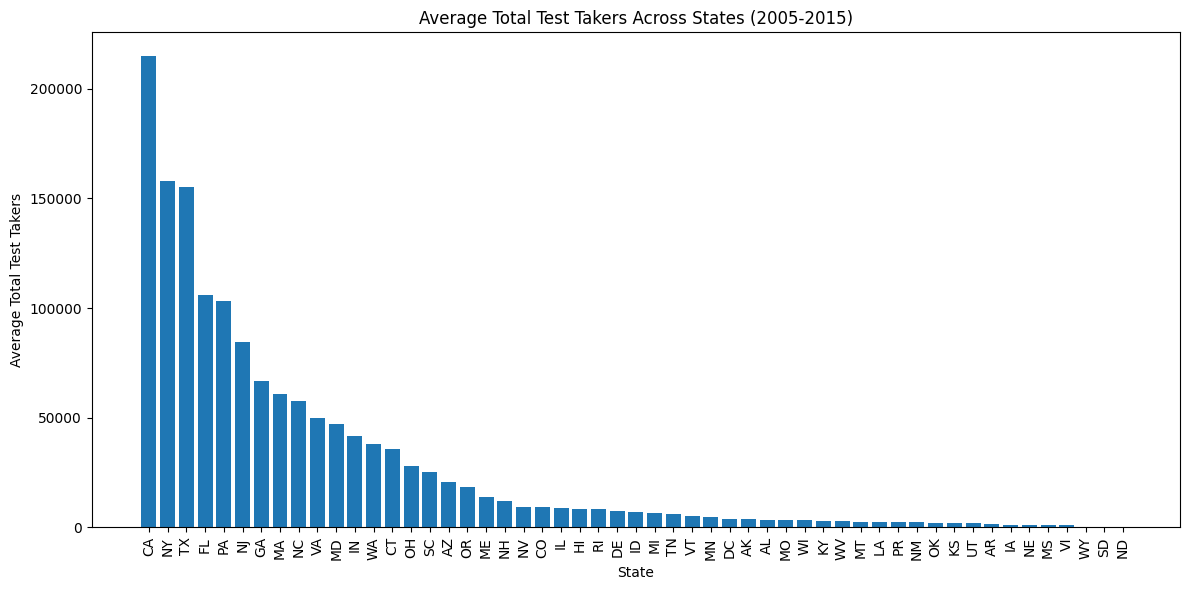

In [24]:
plt.figure(figsize=(12, 6)) 
plt.bar(avg_total.index, avg_total)

plt.xlabel('State')
plt.ylabel('Average Total Test Takers')
plt.title('Average Total Test Takers Across States (2005-2015)')

plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

Above is a graph that showcases the average total test takers across States over the decade between 2005 to 2015. California has the most number of test takers while Wyoming, South Dakota and North Dakota have the least number of test takers. This suggests that there is lower test participation in these states. States with a denser population seem to have more test takers. States with higher population densities often have larger and more diverse school systems, which can lead to increased test participation due to higher student enrollments.

### Number of Test Takers in Each Income Bracket

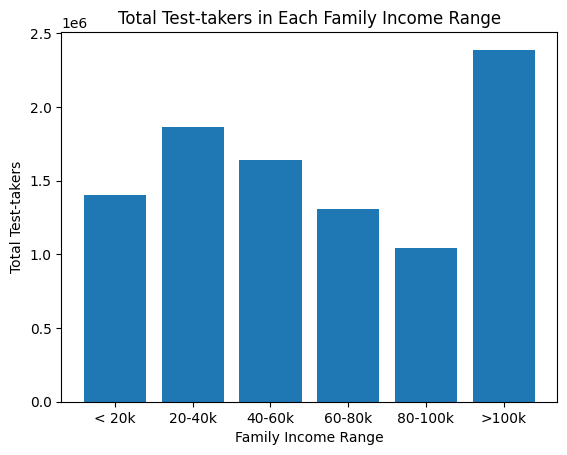

In [33]:
# Calculate the total number of test-takers in each income range
total_20_40k = df['Family Income.Between 20-40k.Test-takers'].sum()
total_40_60k = df['Family Income.Between 40-60k.Test-takers'].sum()
total_60_80k = df['Family Income.Between 60-80k.Test-takers'].sum()
total_80_100k = df['Family Income.Between 80-100k.Test-takers'].sum()
total_less_than_20k = df['Family Income.Less than 20k.Test-takers'].sum()
total_more_than_100k = df['Family Income.More than 100k.Test-takers'].sum()

# Create a bar graph
bracket = ['< 20k', '20-40k', '40-60k', '60-80k', '80-100k', '>100k']
count = [total_less_than_20k, total_20_40k, total_40_60k, total_60_80k, total_80_100k, total_more_than_100k]

plt.bar(bracket, count)

plt.xlabel('Family Income Range')
plt.ylabel('Total Test-takers')
plt.title('Total Test-takers in Each Family Income Range')

plt.show()

There are more test takers in the >100k range than any other range. It would be interesting to later investigate how well students in the 20-40k income bracket perform relative to 80-100k. 

### Average Combined Score Across States for Each Year

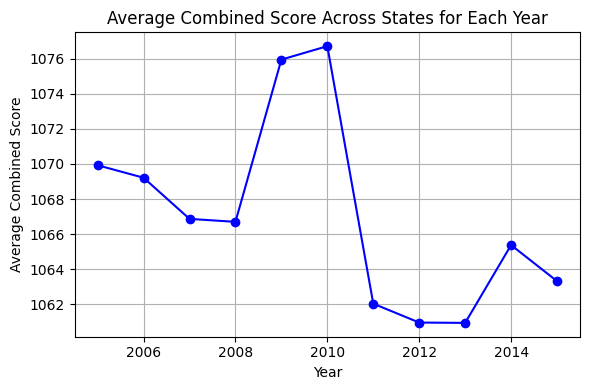

In [26]:
# Calculate the combined score by adding 'Total.Verbal' and 'Total.Math' for each row
df['Combined_Score'] = df['Total.Verbal'] + df['Total.Math']

# Group the DataFrame by 'year' and calculate the average combined score for each year
average_combined_score = df.groupby('Year')['Combined_Score'].mean()

# Plot the data on a line graph
plt.figure(figsize=(6, 4))  # Set the size of the figure (width, height)

# Plot the average combined score against the years
plt.plot(average_combined_score.index, average_combined_score, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Combined Score')
plt.title('Average Combined Score Across States for Each Year')

plt.grid(True) 
plt.tight_layout()  
plt.show()

The average combined score across states for each year was overall increasing between 2005 to 2010 however there was a significant dip in the score after 2010 to 2011 and since then, the average combined score has not recovered to the same score as prior to 2010. According to Yale Daily News (https://yaledailynews.com/blog/2003/11/19/class-of-2010-to-take-on-new-sat-format/), after the 2010 SAT's, the SATs added the essay section.

### Average Combined GPA Across States for Each Year

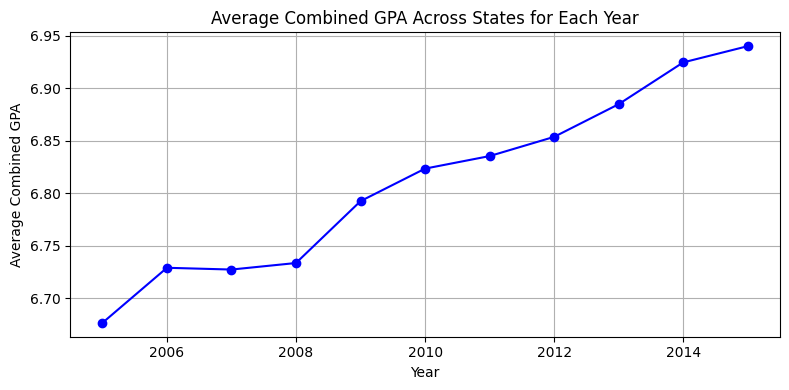

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the SAT Scores dataset into a DataFrame called 'df'
# Make sure 'df' contains columns named 'year', 'Academic Subjects.English.Average GPA', and 'Academic Subjects.Mathematics.Average GPA'

# Calculate the combined GPA by adding 'Academic Subjects.English.Average GPA' and 'Academic Subjects.Mathematics.Average GPA' for each row
df['Combined_GPA'] = df['Academic Subjects.English.Average GPA'] + df['Academic Subjects.Mathematics.Average GPA']

# Group the DataFrame by 'year' and calculate the average combined GPA for each year
average_combined_gpa = df.groupby('Year')['Combined_GPA'].mean()

# Plot the data on a line graph
plt.figure(figsize=(8, 4))  # Set the size of the figure (width, height)

plt.plot(average_combined_gpa.index, average_combined_gpa, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Combined GPA')
plt.title('Average Combined GPA Across States for Each Year')

plt.grid(True)  
plt.tight_layout()
plt.show()


The average combined GPA increases over the years between 2005 to 2015. The increasing trend in the average combined GPA might suggest that students, on average, are achieving higher academic performance over time. On the other hand, this may also have negative implications that I have personally felt during my application process. Inflated grades may have lead to increased competitiveness in the college application process which can also have profound effects on physical and mental health. 

### Case Analysis

In [60]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize

case = word_tokenize(case)

pos = []
neg = []

for word in case:
    score = vader.polarity_scores(word)
    total = score['compound']
    
    if total > 0:
        pos.append(word)
    elif total < 0:
        neg.append(word)
        

The code counts the number of positive words (pos) and negative words (neg) in the tokenized text. The sentiment analysis was performed using the VADER (Valence Aware Dictionary and Sentiment Reasoner), which is a pre-trained model for sentiment analysis in natural language processing.

The VADER lexicon assigns a sentiment score to each word that measures its positivity, negativity, and neutrality. The polarity_scores() function returns a dictionary with different scores, which represents the overall sentiment of the given word. By iterating through each word in the tokenized text and calculating its score, the code determines whether each word is considered positive or negative. The purpose of checking the number of positive and negative words is to get a rough idea of the overall sentiment of the text. 

## Discussion

### Total Test Takers in Family Income Range in Highest and Lowest Test Participating States

#### Total Test Takers in Each Family Income Range in California 

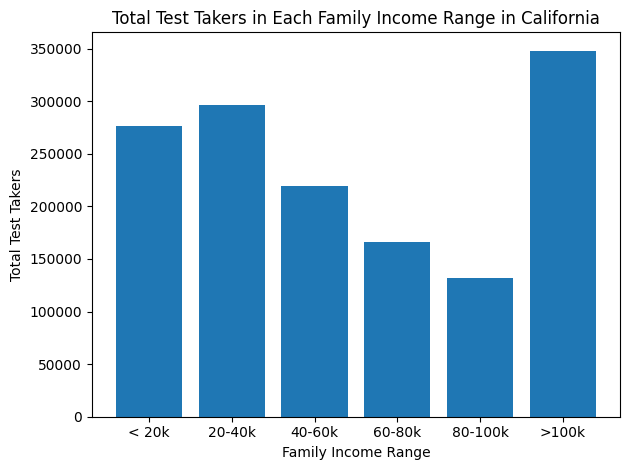

In [29]:
# Filter the data for California
california_data = df[df['State.Name'] == 'California']

# Calculate the total test takers in each family income range
total_test_takers = california_data['Total.Test-takers'].sum()
test_takers_20_40k = california_data['Family Income.Between 20-40k.Test-takers'].sum()
test_takers_40_60k = california_data['Family Income.Between 40-60k.Test-takers'].sum()
test_takers_60_80k = california_data['Family Income.Between 60-80k.Test-takers'].sum()
test_takers_80_100k = california_data['Family Income.Between 80-100k.Test-takers'].sum()
test_takers_less_than_20k = california_data['Family Income.Less than 20k.Test-takers'].sum()
test_takers_more_than_100k = california_data['Family Income.More than 100k.Test-takers'].sum()

# Create a bar graph
brackets = ['< 20k','20-40k', '40-60k', '60-80k', '80-100k', '>100k']
count = [test_takers_less_than_20k, test_takers_20_40k, test_takers_40_60k, test_takers_60_80k, test_takers_80_100k, test_takers_more_than_100k]

plt.bar(brackets, count)

plt.xlabel('Family Income Range')
plt.ylabel('Total Test Takers')
plt.title('Total Test Takers in Each Family Income Range in California')

plt.tight_layout()  # Adjusts the layout to prevent overlapping of labels
plt.show()

The most common test takers in California are from households that earn more than 100k per year. This  suggests that California has a larger proportion of affluent families participating in standardized testing compared to the rest of the country. More study needs to be conducted into variance within the state itself, and how on a local level that certain areas or school districts have a higher concentration of affluent test takers compared to others and thus, higher SAT scores. 

#### Total Test Takers in Each Family Income Range in Virginia 

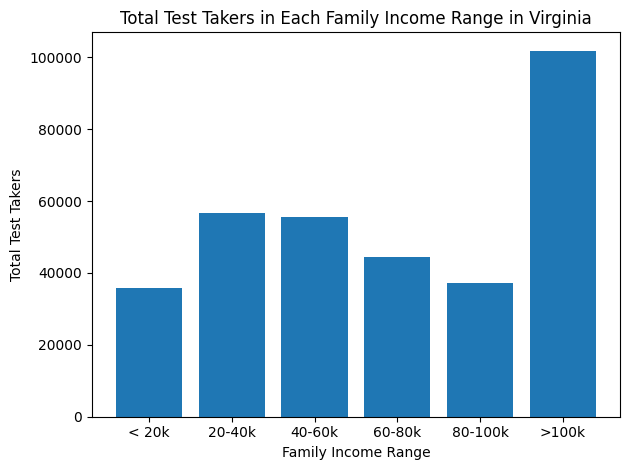

In [30]:
# Filter the data for California
Virginia = df[df['State.Name'] == 'Virginia']

# Calculate the total test takers in each family income range
total_test_takers = Virginia['Total.Test-takers'].sum()
test_takers_20_40k = Virginia['Family Income.Between 20-40k.Test-takers'].sum()
test_takers_40_60k = Virginia['Family Income.Between 40-60k.Test-takers'].sum()
test_takers_60_80k = Virginia['Family Income.Between 60-80k.Test-takers'].sum()
test_takers_80_100k = Virginia['Family Income.Between 80-100k.Test-takers'].sum()
test_takers_less_than_20k = Virginia['Family Income.Less than 20k.Test-takers'].sum()
test_takers_more_than_100k = Virginia['Family Income.More than 100k.Test-takers'].sum()

# Create a bar graph
brackets = ['< 20k','20-40k', '40-60k', '60-80k', '80-100k', '>100k']
count = [test_takers_less_than_20k, test_takers_20_40k, test_takers_40_60k, test_takers_60_80k, test_takers_80_100k, test_takers_more_than_100k]

plt.bar(brackets, count)

plt.xlabel('Family Income Range')
plt.ylabel('Total Test Takers')
plt.title('Total Test Takers in Each Family Income Range in Virginia')

plt.tight_layout()  # Adjusts the layout to prevent overlapping of labels
plt.show()

Despite Virginia having the least amount of test takers in the nation, most of its test takers also are from families with more than 100k income levels. It apears that even though there are less test takers, the percentage of test takers that are from higher income families remains consistent between high numbers of participants and low number of participants in each state. This might suggest that there is less geographical variance in comparison to income variance when it comes to performance on the SAT. 

### Average Combined Scores in California

/tmp/ipykernel_554/619601270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data.loc[:, 'Combined_Score'] = california_data['Total.Verbal'] + california_data['Total.Math']


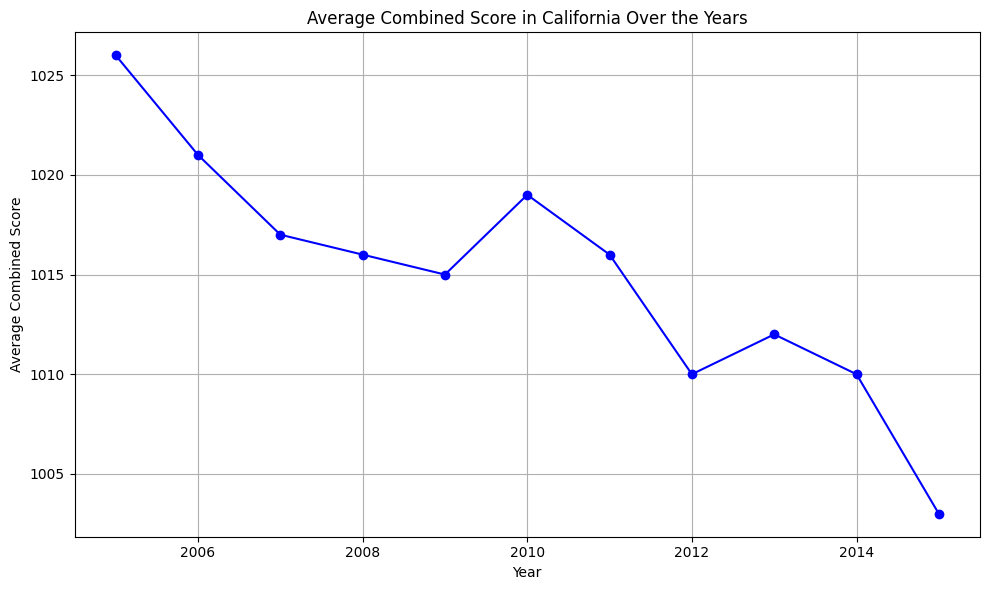

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for California
california_data = df[df['State.Name'] == 'California']

# Calculate the combined score by adding 'Total.Verbal' and 'Total.Math' for each row
california_data.loc[:, 'Combined_Score'] = california_data['Total.Verbal'] + california_data['Total.Math']

# Group the filtered DataFrame by 'year' and calculate the average combined score for each year
average_combined_score = california_data.groupby('Year')['Combined_Score'].mean()

# Plot the data on a line graph
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)

# Plot the average combined score against the years
plt.plot(average_combined_score.index, average_combined_score, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Combined Score')
plt.title('Average Combined Score in California Over the Years')

# Show the plot
plt.grid(True)  # Add grid lines for better visualization
plt.tight_layout()  # Adjusts the layout to prevent overlapping of labels
plt.show()


Despite GPA increasing steadily each year across the nation, the average combined score in California was steadily decreasing and it seems like students were not as effected by the addition of an essay compared to the rest of the nation.  This finding could suggest that California students might be better prepared or less impacted by the essay section, possibly due to better educational approaches or preparation methods in the state.

### Average Combined Scores in Virginia

/tmp/ipykernel_554/2454308043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data.loc[:, 'Combined_Score'] = california_data['Total.Verbal'] + california_data['Total.Math']


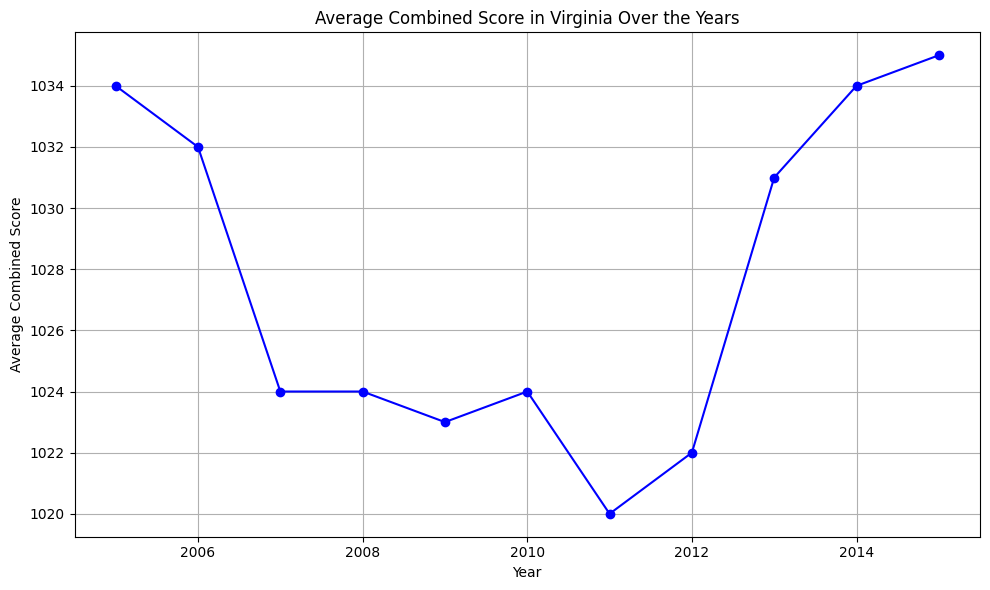

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for California
california_data = df[df['State.Name'] == 'Virginia']

# Calculate the combined score by adding 'Total.Verbal' and 'Total.Math' for each row
california_data.loc[:, 'Combined_Score'] = california_data['Total.Verbal'] + california_data['Total.Math']

# Group the filtered DataFrame by 'year' and calculate the average combined score for each year
average_combined_score = california_data.groupby('Year')['Combined_Score'].mean()

plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)

plt.plot(average_combined_score.index, average_combined_score, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Combined Score')
plt.title('Average Combined Score in Virginia Over the Years')

plt.grid(True)  # Add grid lines for better visualization
plt.tight_layout()  # Adjusts the layout to prevent overlapping of labels
plt.show()


Unlike California, the Average Combined Score in Virginia was decreasing after 2006 when they changed the scoring system and another drop was seen after they added the essay section. However, after 2011, there is a steady increase and the average score is higher than the average score in California. This suggests that there is more variance within the state than there are between the states. 

### Average Combined Scores in 20-40k Income Bracket compared to 80-100k Income Bracket

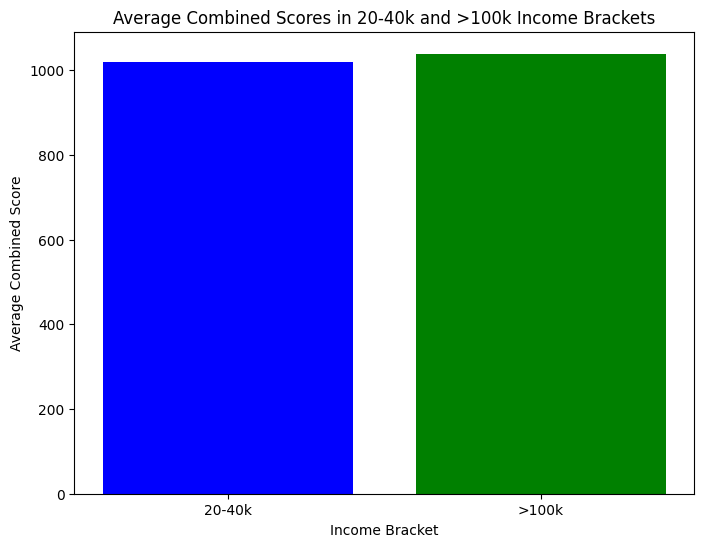

In [61]:
import matplotlib.pyplot as plt

# Step 1: Calculate the total number of test-takers in the 20-40k income bracket
total_test_takers_20_40k = df['Family Income.Between 20-40k.Test-takers'].sum()

# Step 2: Calculate the average combined score for the 20-40k income bracket
average_combined_score_20_40k = (df['Total.Verbal'] + df['Total.Math']).where(df['Family Income.Between 20-40k.Test-takers'] > 1000).mean()

# Step 3: Calculate the total number of test-takers in the >100k income bracket
total_test_takers_100k = df['Family Income.More than 100k.Test-takers'].sum()

# Step 4: Calculate the average combined score for the >100k income bracket
average_combined_score_100k = (df['Total.Verbal'] + df['Total.Math']).where(df['Family Income.More than 100k.Test-takers'] > 1000).mean()

# Step 5: Plot the results
plt.figure(figsize=(8, 6))
plt.bar(['20-40k', '>100k'], [average_combined_score_20_40k, average_combined_score_100k], color=['blue', 'green'])
plt.xlabel('Income Bracket')
plt.ylabel('Average Combined Score')
plt.title('Average Combined Scores in 20-40k and >100k Income Brackets')
plt.show()

Surprisingly, there is not a discrepancy between performance in 20-40k and >100k. This could possible be due to the sample size of data that is collected and how it is mainly higher performing students that are taking the SAT. Furthermore, the average Verbal score does not take into consideration Writing and only the Reading score which can once again explain why there is missing data and thus missing data.

### Case Analysis

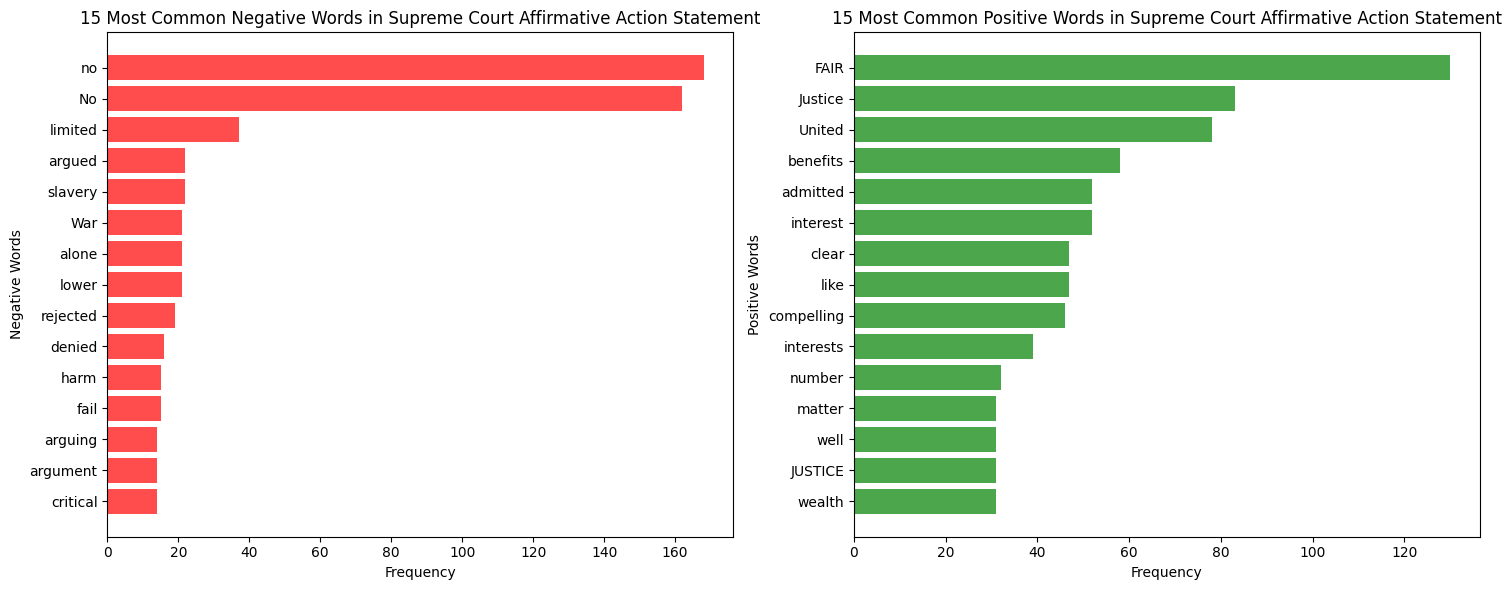

In [39]:
n = 15
freqneg = nltk.FreqDist(neg)
freqpos = nltk.FreqDist(pos)

commneg = []
for word, freq in freqneg.most_common():
    commneg.append(word)
    if len(commneg) == n:
        break

commpos = []
for word, freq in freqpos.most_common():
    commpos.append(word)
    if len(commpos) == n:
        break

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for i, word in enumerate(commneg[::-1]):
    plt.barh(i, freqneg[word], align='center', color='red', alpha=0.7)
    plt.yticks(range(n), commneg[::-1])
plt.xlabel('Frequency')
plt.ylabel('Negative Words')
plt.title('15 Most Common Negative Words in Supreme Court Affirmative Action Statement')

plt.subplot(1, 2, 2)
for i, word in enumerate(commpos[::-1]):
    plt.barh(i, freqpos[word], align='center', color='green', alpha=0.7)
    plt.yticks(range(n), commpos[::-1])
plt.xlabel('Frequency')
plt.ylabel('Positive Words')
plt.title('15 Most Common Positive Words in Supreme Court Affirmative Action Statement')

plt.tight_layout()
plt.show()

The most common negative words were "no", "limited" and "argued". The most common positive words were "Fair", "Justice" and "United". More investigation will be needed in order to investigate whether these were negative words to describe the decision or the concept of affirmative action. However, it does provide insight into the kind of language that is being used surrounding the topic of affirmative action such as institutional inequities like slavery and war.  Thus, it is important to consider historical perspective in discussions related to affirmative action. 